# Dataset To Database
Notebook responsável para armazenanmento de informações no banco de dados

Motivador: Guardar as principais informações dos exames no banco de dados

Código utilizado para mapear cada record (pasta) baixado do dataset. Ex: chb01, chb02 ...

In [ ]:
import os

records_list = os.listdir('../data/')

part_codes = sorted(list(set([record.split('/')[0] for record in records_list])))

Nesse ponto, já temos o sumário de cada exame baixado, assim, iremos converte-lo em informações que facilitam sua utilização e iremos salva-los no banco de dados

get_summary_info: Lê cada o sumário informado

In [ ]:
import os

def get_summary_info( record ):
    directory = "../data/" + record + '/'
    filename = record + '-summary.txt'
    fullpath = os.path.join( directory, filename )

    with open(fullpath, encoding='UTF-8') as f:
      content = f.readlines()
      f.close()

    return content

summary_info: Utilizado para ler cada arquivo de sumário e salvar as informações de cada um dos arquivos no banco de dados caso já exista o edf baixado, isso evita que insira informações que ainda não estão disponíveis

In [ ]:
import re
import database.databaseutils as db

def summary_info(content, record_name):

  nr_channels = 0
  file_name = ""
  start_time = ""
  end_time = ""
  start_seizure = ""
  end_seizure = ""
  nr_seizures = ""
  ds_channels = []

  for line in content:

    if re.findall('Channel \d+', line):
      nr_channels += 1
      channel = re.findall(line.split(': ')[1], line)[0].replace("\n", "")
      ds_channels.append(channel)

    elif re.findall('Channels changed', line):
      nr_channels = 0
      ds_channels.clear()

    elif re.findall('File Name', line):
      file_name = re.findall('\w+_\w+.\.edf', line)[0]

    elif re.findall('File Start Time', line):
      start_time = re.findall('\d+:\d+:\d+', line)[0]

    elif re.findall('File End Time', line):
      end_time = re.findall('\d+:\d+:\d+', line)[0]

    elif re.findall('Seizure Start Time', line):
      start_seizure = re.findall('\d+', line)[0]

    elif re.findall('Seizure End Time', line):
      end_seizure = re.findall('\d+', line)[0]

    elif re.findall('Number of Seizures in File', line):
      nr_seizures = re.findall('\d+', line)[0]

    else:
      if file_name != "":
        directory = "../data/" + record_name + '/'
        fullpath = os.path.join( directory, file_name )

        if os.path.exists( fullpath ):

            db.insert_sumarry_data(record_name,
                                   file_name,
                                   start_time,
                                   end_time,
                                   int(nr_seizures),
                                   int(start_seizure) if start_seizure.strip() != "" else 0,
                                   int(end_seizure) if end_seizure.strip() != "" else 0,
                                   nr_channels,
                                   ','.join(ds_channels))

        file_name = ""
        start_time = ""
        end_time = ""
        start_seizure = ""
        end_seizure = ""
        nr_seizures = ""

In [ ]:
for record in part_codes:
    record_context = get_summary_info(record)
    summary_info(record_context, record)
    

Como resultado, temos a seguinte tabela populada:

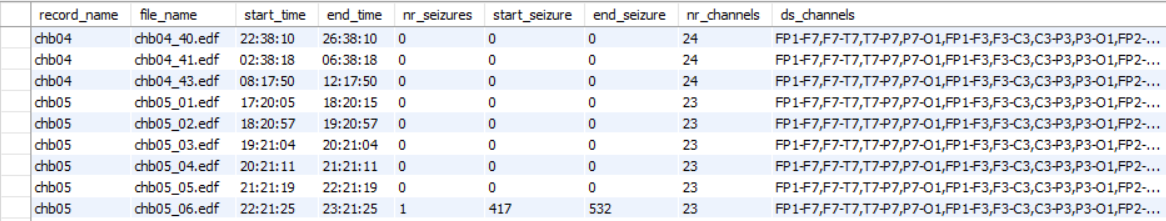